## EBS 영상길이 시각화

In [7]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [42]:
# 오디오 파일이 저장된 폴더 경로
folder_path = 'ebs_audio_combined_1~45'

# 각 오디오의 길이를 저장할 리스트
audio_lengths = []
sequence_numbers = []  # 순서대로 숫자를 저장할 리스트

# 폴더 내 모든 오디오 파일의 길이를 추출하고 순서대로 번호 부여
for idx, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".mp3"):  # 확장자에 맞게 필터링
        audio_path = os.path.join(folder_path, filename)
        audio = AudioSegment.from_mp3(audio_path)
        
        # 1부터 순차적인 숫자 부여
        sequence_numbers.append(str(idx + 1))
        audio_lengths.append(len(audio) / 60000)  # 길이를 분 단위로 변환


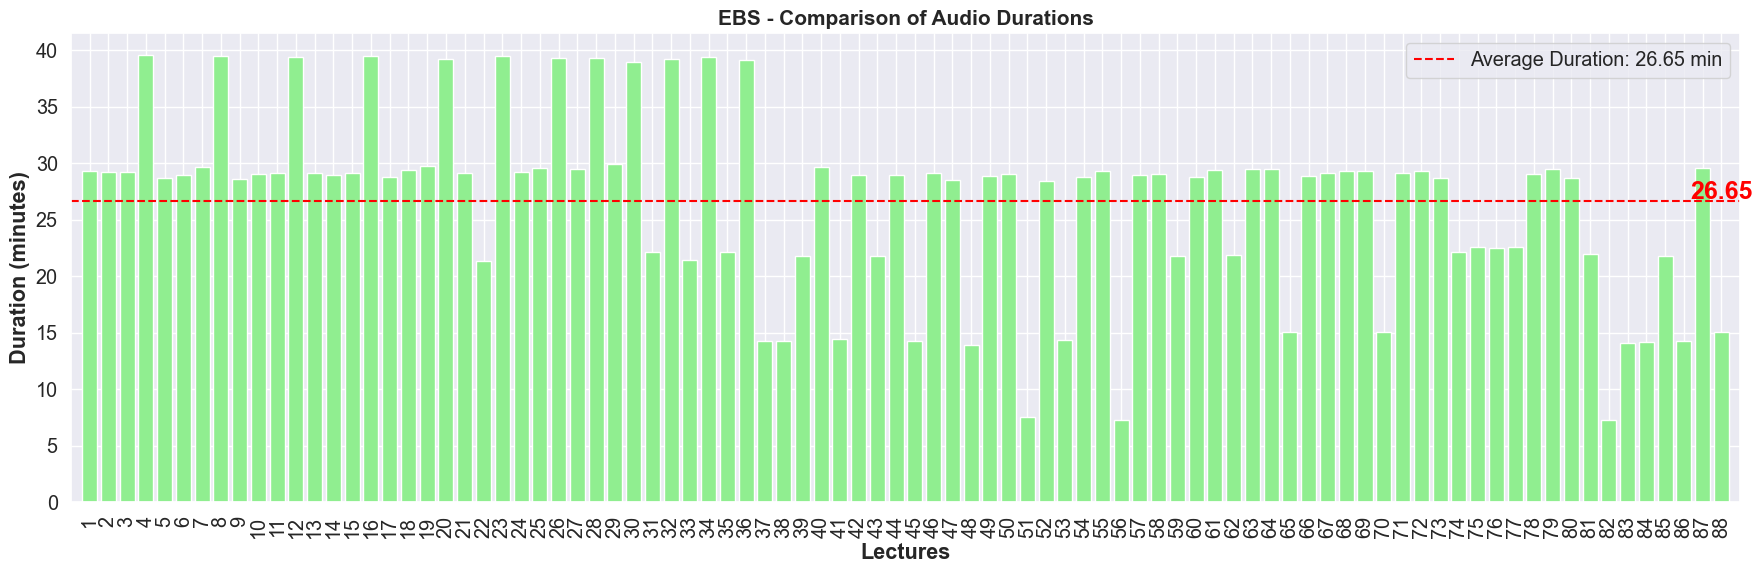

In [44]:
# 평균 길이 계산
average_length = sum(audio_lengths) / len(audio_lengths)
sns.set(font_scale=1.3)

# 막대그래프 그리기
plt.figure(figsize=(18, 6))
plt.bar(sequence_numbers, audio_lengths, width=0.8, color='lightgreen')
plt.subplots_adjust(left=0.3, right=0.7)
plt.title('EBS - Comparison of Audio Durations', fontsize=15, weight='bold')
plt.xlabel('Lectures', weight='bold')
plt.ylabel('Duration (minutes)', weight='bold')
plt.xticks(rotation=90)  # 파일 이름이 잘 보이도록 회전

# x축 간격 조정
plt.xlim(-1, len(sequence_numbers))

# 평균 길이 선 추가
plt.axhline(y=average_length, color='red', linestyle='--', label=f'Average Duration: {average_length:.2f} min')
plt.legend(loc='upper right')  # 범례 추가

# 평균 길이 텍스트 표시
plt.text(len(sequence_numbers) - 1, average_length + 0.2, f'{average_length:.2f}', color='red', fontsize=18, ha='center', weight='bold')

plt.tight_layout()
plt.show()

## KHAN 영상길이 시각화

In [13]:
# 오디오 파일이 저장된 폴더 경로
folder_path = 'khan_audio copy'

In [14]:
# 각 오디오 파일의 길이를 저장할 리스트
audio_lengths = []
sequence_numbers = []  # 순서대로 숫자를 저장할 리스트

# 파일 이름을 순서대로 번호로 바꾸고 길이 추출
for idx, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".mp3"):  # 확장자에 맞게 필터링
        old_file_path = os.path.join(folder_path, filename)
        
        # 순차적인 숫자 부여 (파일 개수에 맞춰서)
        sequence_numbers.append(str(idx + 1))
        
        # 파일의 길이 추출
        audio = AudioSegment.from_mp3(old_file_path)
        audio_lengths.append(len(audio) / 60000)  # 길이를 분 단위로 변환



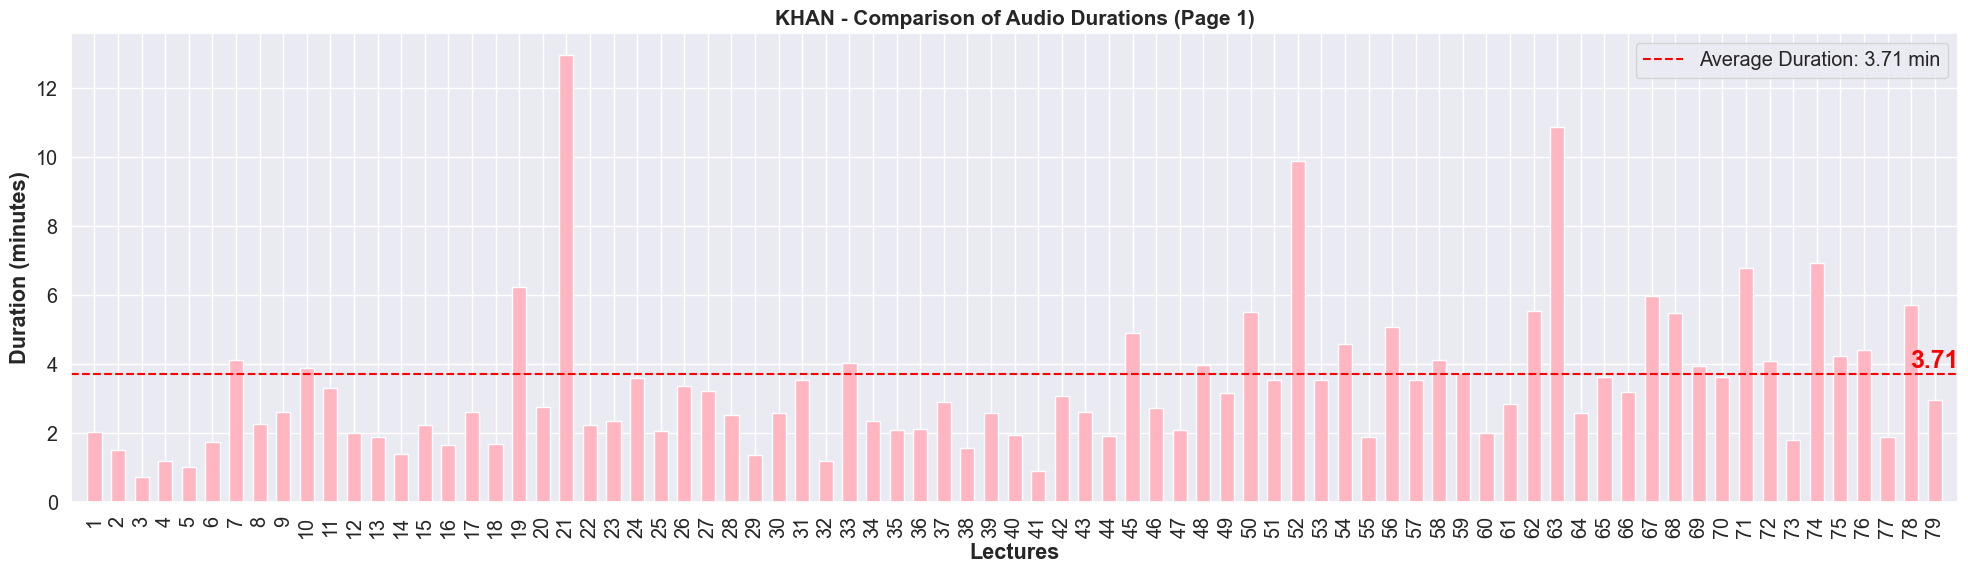

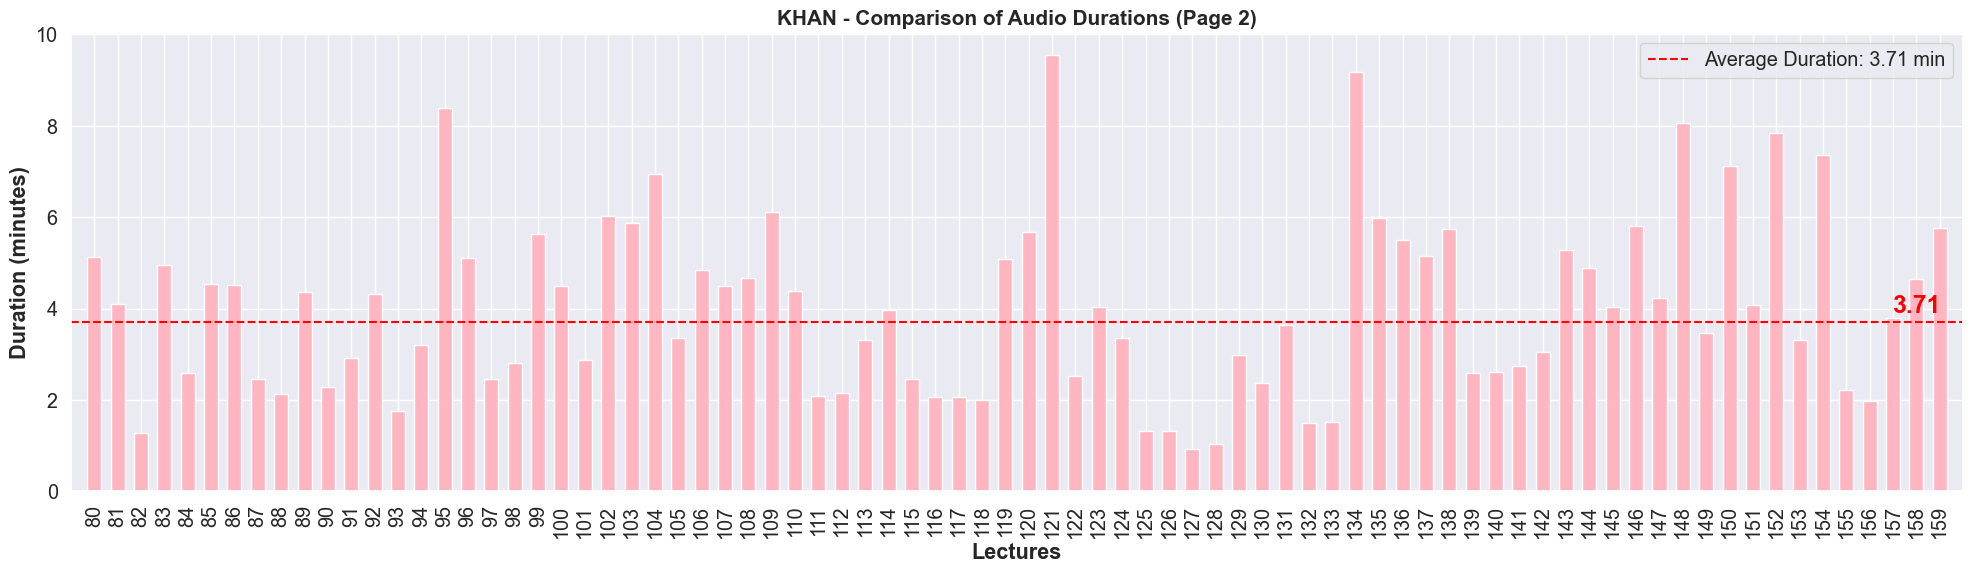

In [28]:
# 평균 길이 계산
average_length = sum(audio_lengths) / len(audio_lengths)

# 페이지당 표시할 파일 수 (2페이지로 나누기 위해 파일 수를 절반으로 나눔)
total_files = len(audio_lengths)
files_per_page = total_files // 2

sns.set(font_scale=1.3)

# 페이지 1: 첫 번째 절반
plt.figure(figsize=(20, 6))
plt.bar(sequence_numbers[:files_per_page], audio_lengths[:files_per_page], width=0.6, color='lightpink')
plt.title('KHAN - Comparison of Audio Durations (Page 1)', fontsize=15, weight='bold')
plt.xlabel('Lectures', weight='bold')
plt.ylabel('Duration (minutes)', weight='bold')
plt.xticks(rotation=90)
plt.xlim(-1, files_per_page)

# 평균 길이 선 추가
plt.axhline(y=average_length, color='red', linestyle='--', label=f'Average Duration: {average_length:.2f} min')
plt.legend(loc='upper right')

# 평균 길이 텍스트 표시
plt.text(files_per_page - 1, average_length + 0.2, f'{average_length:.2f}', color='red', fontsize=18, ha='center', weight='bold')


plt.tight_layout()
plt.show()

# 페이지 2: 두 번째 절반
plt.figure(figsize=(20, 6))
plt.bar(sequence_numbers[files_per_page:], audio_lengths[files_per_page:], width=0.6, color='lightpink')
plt.title('KHAN - Comparison of Audio Durations (Page 2)', fontsize=15, weight='bold')
plt.xlabel('Lectures', weight='bold')
plt.ylabel('Duration (minutes)', weight='bold')
plt.xticks(rotation=90)
plt.xlim(-1, total_files - files_per_page)

# 평균 길이 선 추가
plt.axhline(y=average_length, color='red', linestyle='--', label=f'Average Duration: {average_length:.2f} min')
plt.legend(loc='upper right')

# 평균 길이 텍스트 표시
plt.text(files_per_page - 1, average_length + 0.2, f'{average_length:.2f}', color='red', fontsize=18, ha='center', weight='bold')

plt.tight_layout()
plt.show()